Enter your username: Redd
Enter your matriculation number: 12121
Login successful!

1. img1.jpeg
2. img10.jpeg
3. img2.jpeg
4. img3.jpeg
5. img4.jpeg
6. img5.jpeg
7. img6.jpeg
8. img7.jpeg
9. img8.jpeg
10. img9.jpeg
Select an image (number): 7

Choose an enhancement technique:
1. Grayscale Conversion
2. Adjust Brightness & Contrast
3. Sharpen Image
4. Remove Noise
5. Scale Image
6. Invert Colors
Enter your choice: 3


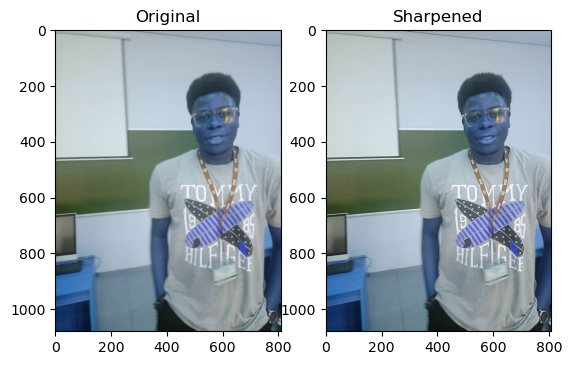

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function for user login
def login():
    username = input("Enter your username: ")
    matno = input("Enter your matriculation number: ")
    print("Login successful!\n")

# Function to list all images in the given folder
def list_images(folder):
    return [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Function to allow user to select an image from the folder
def select_image(folder):
    images = list_images(folder)
    for i, img in enumerate(images):
        print(f"{i + 1}. {img}")
    choice = int(input("Select an image (number): ")) - 1
    return os.path.join(folder, images[choice])

# Function to convert an image to grayscale
def grayscale(img_path):
    return cv2.imread(img_path, 0)  # Read image in grayscale mode

# Function to adjust brightness and contrast
def adjust_brightness_contrast(img, brightness=5, contrast=1.5):
    return cv2.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness)

# Function to sharpen an image
def sharpen(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# Function to remove noise using a median filter
def remove_noise(img):
    return cv2.medianBlur(img, 5)

# Function to scale an image by a factor of 2 along both axes
def scale_image(img, fx=2, fy=2):
    return cv2.resize(img, None, fx=fx, fy=fy)

# Function to invert colors of an image
def invert_colors(img):
    return 255 - img

# Function to display original and processed images
def display_image(original, processed, title):
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(original)  # Directly display the original image
    
    plt.subplot(1, 2, 2)
    plt.title(title)
    # Check if the processed image is grayscale or color
    if len(processed.shape) == 2:
        plt.imshow(processed, cmap='gray')  # Display grayscale images correctly
    else:
        plt.imshow(processed)  # Directly display the processed image
    
    plt.show()

def main():
    login()
    folder = 'P2img'
    image_path = select_image(folder)
    img = cv2.imread(image_path)
    
    print("\nChoose an enhancement technique:")
    print("1. Grayscale Conversion")
    print("2. Adjust Brightness & Contrast")
    print("3. Sharpen Image")
    print("4. Remove Noise")
    print("5. Scale Image")
    print("6. Invert Colors")
    
    choice = int(input("Enter your choice: "))
    
    # Dictionary mapping choices to functions and titles
    techniques = {
        1: (lambda img: grayscale (image_path), "Grayscale"),
        2: (adjust_brightness_contrast, "Brightness & Contrast"),
        3: (sharpen, "Sharpened"),
        4: (remove_noise, "Noise Removed"),
        5: (scale_image, "Scaled"),
        6: (invert_colors, "Inverted Colors")
    }
    
    if choice in techniques:
        func, title = techniques[choice] # Retrieve function and title
        processed_img = func(img) # Apply selected enhancement function
        display_image(img, processed_img, title) # Display original and processed images
    else:
        print("Invalid choice!")

if __name__ == "__main__":
    main()
